In [1]:
import numpy as np
import math
import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('legend',fontsize=15) 

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model

In [3]:
import pickle

In [4]:
import scipy
from scipy.stats import rv_histogram

import seaborn as sns

### Functions - common for each notebook

In [5]:
from basic_functions import trajectory, trajectory_intervals, generate_nn_input, check_distribution, plot_distribution

### Functions - modified for each case

In [10]:
def trajectories(T, n, k, Wiener=None):
  
    h = float(T/n)
    h_sqrt = np.sqrt(h)
    # values_in_T = []
    X_real = []
    X_approx = []
    T_ = []
  
    for j in range(k):
        
        X_real_temp = x_0
        X_approx_temp = x_0

        x_real = [X_real_temp]
        x_approx = [X_approx_temp]

        t_temp = 0.0
        t = [t_temp]
        
        for i in range(1, n+1):

            if Wiener is not None:
                dW = Wiener[i-1]

            else:
                dW = np.random.normal(0, h_sqrt)

            X_r = X_real_temp + a(t_temp, X_real_temp)*h + b(t_temp, X_real_temp)*dW
            x_real.append(X_r)  

            X_a = X_approx_temp + a_(t_temp, X_approx_temp, mu_[i], sigma_[i])*h + b_(t_temp, X_approx_temp, mu_[i], sigma_[i])*dW
            x_approx.append(X_a)  

            t_temp = i*h
            t.append(t_temp)

            X_real_temp = X_r
            X_approx_temp = X_a

        X_real.append(x_real)
        X_approx.append(x_approx)


        T_.append(t)

        if (len(np.array(X_real).flatten()) != len(np.array(X_approx).flatten())):
          print("Trajectories have different length")
      
    return np.array(T_).flatten(), np.array(X_real).flatten(), np.array(X_approx).flatten()

In [11]:
def trajectories_intervals(T, n, k, Wiener=None):
  
    h = float(T/n)
    h_sqrt = np.sqrt(h)
    X_real = []
    X_approx = []
    
    X_approx_lower_ = []
    X_approx_upper_ = []
    
    
    T_ = []
  
    for j in range(k):
        
        X_real_temp = x_0
        X_approx_temp = x_0

        x_real = [X_real_temp]
        x_approx = [X_approx_temp]
        x_approx_lower = [X_approx_temp]
        x_approx_upper = [X_approx_temp]

        t_temp = 0.0
        t = [t_temp]
        
        for i in range(1, n+1):

            if Wiener is not None:
                dW = Wiener[i-1]

            else:
                dW = np.random.normal(0, h_sqrt)

            X_r = X_real_temp + a(t_temp, X_real_temp)*h + b_real(t_temp, X_real_temp)*dW
            x_real.append(X_r)  

            X_a =  X_a = X_approx_temp + a_(t_temp, X_approx_temp, mu_[i], sigma_[i])*h + b_(t_temp, X_approx_temp, mu_[i], sigma_[i])*dW
            x_approx.append(X_a)  
            

            X_a_lower = X_approx_temp + a_(t_temp, X_approx_temp, mu_[i], sigma_[i])*h - 2* np.abs(b_(t_temp, X_approx_temp, mu_[i], sigma_[i]))*np.sqrt(h)
            X_a_upper = X_approx_temp + a_(t_temp, X_approx_temp, mu_[i], sigma_[i])*h + 2* np.abs(b_(t_temp, X_approx_temp, mu_[i], sigma_[i]))*np.sqrt(h)
            x_approx_lower.append(X_a_lower)  
            x_approx_upper.append(X_a_upper)  
        

            t_temp = i*h
            t.append(t_temp)

            X_real_temp = X_r
            X_approx_temp = X_a

        X_real.append(x_real)
        X_approx.append(x_approx)
        X_approx_lower_.append(x_approx_lower)
        X_approx_upper_.append(x_approx_upper)


        T_.append(t)

        if (len(np.array(X_real).flatten()) != len(np.array(X_approx).flatten())):
          print("Trajectories have different length")
      
    return np.array(T_).flatten(), np.array(X_real).flatten(), np.array(X_approx).flatten(), np.array(X_approx_lower_).flatten(), np.array(X_approx_upper_).flatten()

### Step 1. Define an equation

In [12]:
def mu(t):
    return 7.5*t*t*np.sin(3.5*t*np.pi)

def sigma(t):
    return (3 + 3*t**2-3*t*np.sin(3*t*np.pi))/40

In [13]:
def a(t, x):
    return mu(t)-0.5*np.power(sigma(t),2)

def b(t, x):
    return sigma(t)

In [14]:
x_0 = 1.2

In [15]:
equation = [x_0, a, b]

### Step 2. Simulation

In [16]:
# time
T = 1.2

# number of points
n = 80000

# number of trajectories
k = 1

In [17]:
# set the Wiener process

h = float(T/n)
h_sqrt = np.sqrt(h)

wiener_process = [np.random.normal(0, h_sqrt) for i in range(n)]

# file = open('wiener_process_example_04', 'rb')
# wiener_process = pickle.load(file)
# file.close()

In [18]:
t_values, x_values = trajectory(T, n, k, equation, wiener_process)

In [19]:
t_values, x_values, x_low, x_up = trajectory_intervals(T, n, k, equation, wiener_process)

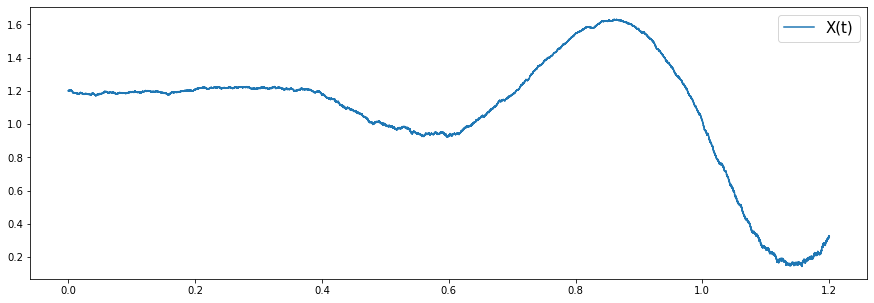

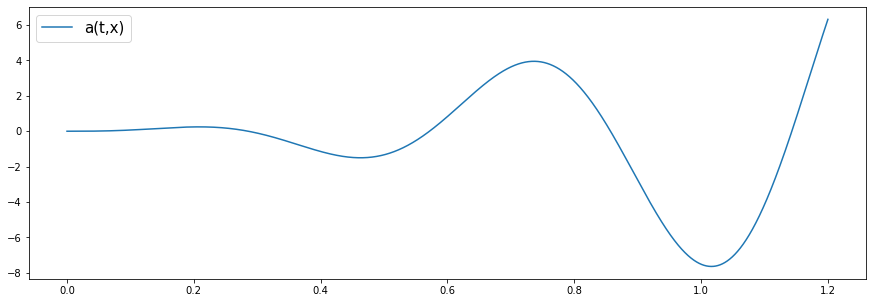

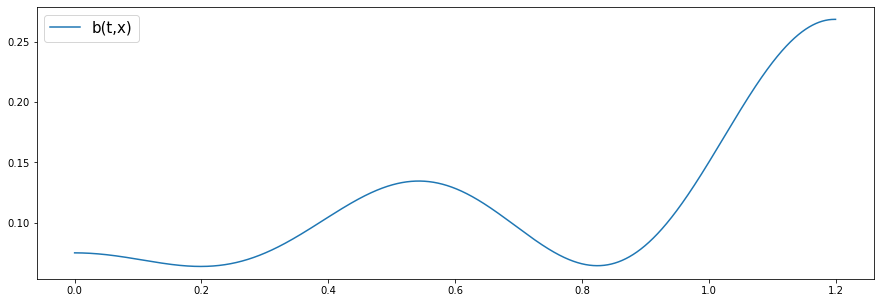

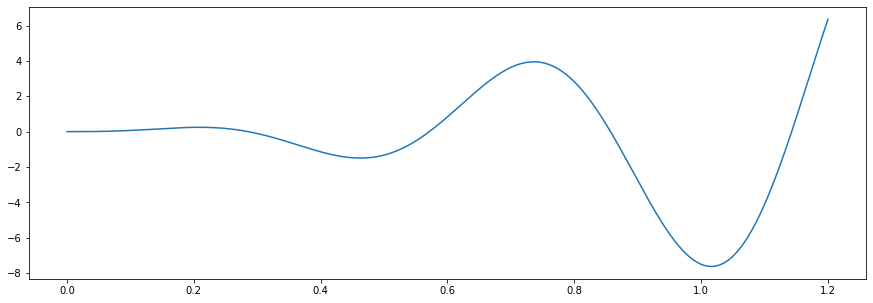

In [20]:
plt.plot(t_values, x_values, label='X(t)')
plt.legend()
plt.show()

plt.plot(t_values, a(t_values,x_values), label='a(t,x)')
plt.legend()
plt.show()

plt.plot(t_values, b(t_values,x_values), label='b(t,x)')
plt.legend()
plt.show()

plt.plot(t_values, a(t_values,x_values)+0.5*b(t_values,x_values)*b(t_values,x_values))
plt.show()

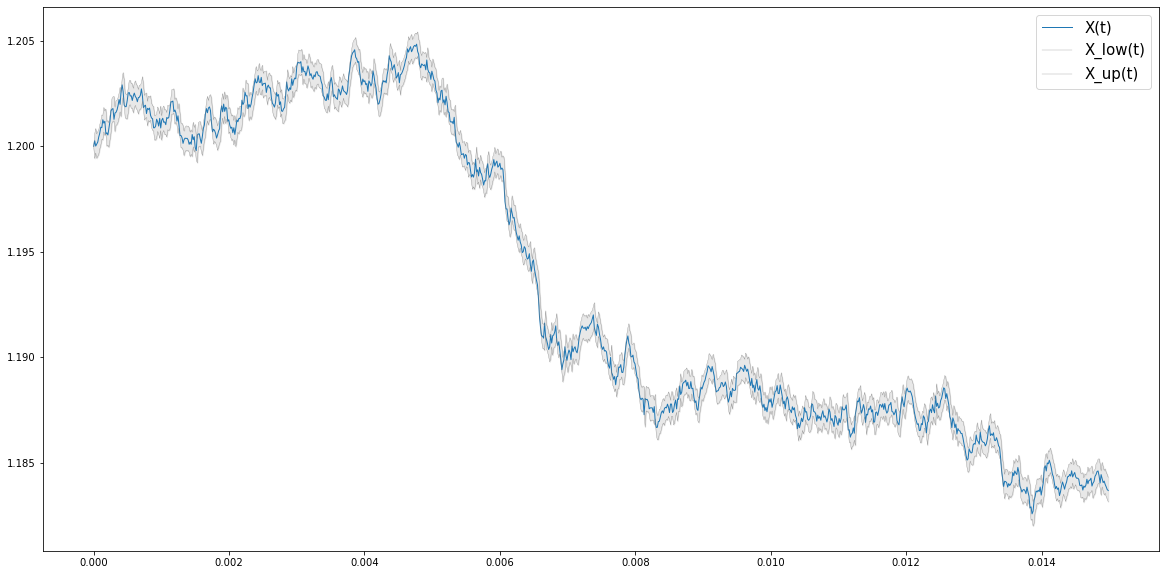

In [21]:
k = 1000

t = t_values[:k]
x1=x_values[:k]
x2=x_low[:k]
x3=x_up[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='X(t)', linewidth=1)
plt.plot(t, x2, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x3, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t_values[:1000], x2, x3, color='lightgrey',alpha=0.5)


plt.legend()
plt.show()

### Step 3. Estimate chosen parameter using neural network

#### 3.1 Loss function

In [22]:
def a_(t, x, mu, sigma):
    return mu-0.5*tf.square(sigma)

def b_(t, x, mu, sigma):
    return sigma

In [23]:
# def custom_activation(x):
#     return tf.sign(x)*tf.sqrt(tf.abs(x))

In [24]:
def SDE_params_loss(y_true,y_pred):
    mu=tf.slice(y_pred,[0,0],[-1,1])              # A     
    sigma=tf.math.exp(tf.slice(y_pred,[0,1],[-1,1]))   # B  
    x_diff = tf.slice(y_true,[0,2],[-1,1])
    h = tf.slice(y_true,[0,3],[-1,1])
    x = tf.slice(y_true,[0,1],[-1,1])
    t = tf.slice(y_true,[0,0],[-1,1])

    A = tf.math.log(2*math.pi*h*tf.square((b_(t,x,mu, sigma))))
    B = tf.square(x_diff - a_(t,x, mu, sigma)*h) / (h * tf.square(b_(t,x,mu, sigma)))
    loss = tf.reduce_sum(0.5*(A+B),axis=0)
    return loss

# #A extract first column for μ 
# #B extract second column for σ

#### 3.2 Neural network model

In [25]:
x_data, y_data = generate_nn_input(t_values, x_values)

In [26]:
model =  Sequential()
model.add(Dense(30, activation='sigmoid',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(2, activation='linear'))

model.compile(loss=SDE_params_loss,
              optimizer=optimizers.Adam(learning_rate=0.0005),
              metrics=[SDE_params_loss])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                60        
                                                                 
 dense_1 (Dense)             (None, 50)                1550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
Total params: 2,672
Trainable params: 2,672
Non-trainable params: 0
_________________________________________________________________


In [28]:
plot_model(model, to_file='model_04_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


#### 3.3 Training

In [30]:
history=model.fit(x_data, y_data, 
                  batch_size=228, 
                  epochs=1200,
                  verbose=1
                 )

Epoch 1/1200
351/351 [==============================] - 1s 1ms/step - loss: -1391.7375 - SDE_params_loss: -1391.6864
Epoch 2/1200
351/351 [==============================] - 0s 1ms/step - loss: -1414.9310 - SDE_params_loss: -1414.8649
Epoch 3/1200
351/351 [==============================] - 0s 1ms/step - loss: -1423.0859 - SDE_params_loss: -1423.0219
Epoch 4/1200
351/351 [==============================] - 0s 1ms/step - loss: -1437.5165 - SDE_params_loss: -1437.4587
Epoch 5/1200
351/351 [==============================] - 1s 1ms/step - loss: -1441.2150 - SDE_params_loss: -1441.1544A: 0s - loss: -1441.9813 - SDE_params_loss: -1441.98
Epoch 6/1200
351/351 [==============================] - 0s 1ms/step - loss: -1441.3235 - SDE_params_loss: -1441.2561
Epoch 7/1200
351/351 [==============================] - 1s 2ms/step - loss: -1441.4156 - SDE_params_loss: -1441.3524
Epoch 8/1200
351/351 [==============================] - 0s 1ms/step - loss: -1441.5481 - SDE_params_loss: -1441.4850
Epoch 9/1200

351/351 [==============================] - 0s 1ms/step - loss: -1459.7028 - SDE_params_loss: -1459.6411
Epoch 138/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.7170 - SDE_params_loss: -1459.6548
Epoch 139/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.7036 - SDE_params_loss: -1459.6406
Epoch 140/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.7062 - SDE_params_loss: -1459.6447
Epoch 141/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.7128 - SDE_params_loss: -1459.6511
Epoch 142/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.7217 - SDE_params_loss: -1459.6619A: 0s - loss: -1461.5134 - SDE_params_loss: -146
Epoch 143/1200
351/351 [==============================] - 1s 1ms/step - loss: -1459.7389 - SDE_params_loss: -1459.6780
Epoch 144/1200
351/351 [==============================] - 1s 2ms/step - loss: -1459.7457 - SDE_params_loss: -1459.6715
Epoch 145/1200


351/351 [==============================] - 0s 1ms/step - loss: -1460.0164 - SDE_params_loss: -1459.9553
Epoch 274/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.9980 - SDE_params_loss: -1459.9330
Epoch 275/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.9791 - SDE_params_loss: -1459.9192
Epoch 276/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.0153 - SDE_params_loss: -1459.9495
Epoch 277/1200
351/351 [==============================] - 0s 1ms/step - loss: -1459.9919 - SDE_params_loss: -1459.9246
Epoch 278/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.0010 - SDE_params_loss: -1459.9362
Epoch 279/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.0238 - SDE_params_loss: -1459.9540
Epoch 280/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.0503 - SDE_params_loss: -1459.9885
Epoch 281/1200
351/351 [==============================] - 0s 1m

Epoch 342/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1305 - SDE_params_loss: -1460.0624
Epoch 343/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1140 - SDE_params_loss: -1460.0496
Epoch 344/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1208 - SDE_params_loss: -1460.0485
Epoch 345/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.0919 - SDE_params_loss: -1460.0298
Epoch 346/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1095 - SDE_params_loss: -1460.0416
Epoch 347/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1221 - SDE_params_loss: -1460.0594
Epoch 348/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1425 - SDE_params_loss: -1460.0776
Epoch 349/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1338 - SDE_params_loss: -1460.0712
Epoch 350/1200
351/351 [========================

Epoch 479/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1604 - SDE_params_loss: -1460.0948
Epoch 480/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2010 - SDE_params_loss: -1460.1370
Epoch 481/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1931 - SDE_params_loss: -1460.1334
Epoch 482/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1598 - SDE_params_loss: -1460.1024
Epoch 483/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1750 - SDE_params_loss: -1460.1162
Epoch 484/1200
351/351 [==============================] - 1s 1ms/step - loss: -1460.1896 - SDE_params_loss: -1460.1252
Epoch 485/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1750 - SDE_params_loss: -1460.1160
Epoch 486/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2109 - SDE_params_loss: -1460.1484
Epoch 487/1200
351/351 [========================

351/351 [==============================] - 0s 1ms/step - loss: -1460.2064 - SDE_params_loss: -1460.1417
Epoch 614/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1960 - SDE_params_loss: -1460.1332
Epoch 615/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2076 - SDE_params_loss: -1460.1531
Epoch 616/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1930 - SDE_params_loss: -1460.1315
Epoch 617/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2134 - SDE_params_loss: -1460.1501
Epoch 618/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2281 - SDE_params_loss: -1460.1625
Epoch 619/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.1882 - SDE_params_loss: -1460.1304
Epoch 620/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2233 - SDE_params_loss: -1460.1614
Epoch 621/1200
351/351 [==============================] - 0s 1m

351/351 [==============================] - 0s 1ms/step - loss: -1460.2203 - SDE_params_loss: -1460.1578
Epoch 748/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2021 - SDE_params_loss: -1460.1410
Epoch 749/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2177 - SDE_params_loss: -1460.1595
Epoch 750/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2225 - SDE_params_loss: -1460.1653
Epoch 751/1200
351/351 [==============================] - 1s 3ms/step - loss: -1460.2465 - SDE_params_loss: -1460.1857A: 0s - loss: -1461.7449 - SDE_params_los
Epoch 752/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2175 - SDE_params_loss: -1460.1564
Epoch 753/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2406 - SDE_params_loss: -1460.1746
Epoch 754/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2229 - SDE_params_loss: -1460.1611
Epoch 755/1200
351/351

351/351 [==============================] - 1s 1ms/step - loss: -1460.2200 - SDE_params_loss: -1460.1610
Epoch 883/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2206 - SDE_params_loss: -1460.1615
Epoch 884/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2266 - SDE_params_loss: -1460.1591
Epoch 885/1200
351/351 [==============================] - 1s 1ms/step - loss: -1460.2148 - SDE_params_loss: -1460.1597
Epoch 886/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2291 - SDE_params_loss: -1460.1774
Epoch 887/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2021 - SDE_params_loss: -1460.1339
Epoch 888/1200
351/351 [==============================] - 1s 2ms/step - loss: -1460.2318 - SDE_params_loss: -1460.1696
Epoch 889/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2175 - SDE_params_loss: -1460.1566
Epoch 890/1200
351/351 [==============================] - 1s 2m

351/351 [==============================] - 0s 1ms/step - loss: -1460.2275 - SDE_params_loss: -1460.1633
Epoch 1016/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2247 - SDE_params_loss: -1460.1616
Epoch 1017/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2469 - SDE_params_loss: -1460.1732
Epoch 1018/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2349 - SDE_params_loss: -1460.1790
Epoch 1019/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2084 - SDE_params_loss: -1460.1483
Epoch 1020/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2261 - SDE_params_loss: -1460.1660
Epoch 1021/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2314 - SDE_params_loss: -1460.1740
Epoch 1022/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2552 - SDE_params_loss: -1460.1948
Epoch 1023/1200
351/351 [==============================]

351/351 [==============================] - 0s 1ms/step - loss: -1460.2231 - SDE_params_loss: -1460.1709
Epoch 1084/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2310 - SDE_params_loss: -1460.1676
Epoch 1085/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2426 - SDE_params_loss: -1460.1780
Epoch 1086/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2184 - SDE_params_loss: -1460.1592
Epoch 1087/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2485 - SDE_params_loss: -1460.1832
Epoch 1088/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2114 - SDE_params_loss: -1460.1523
Epoch 1089/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2386 - SDE_params_loss: -1460.1748
Epoch 1090/1200
351/351 [==============================] - 0s 1ms/step - loss: -1460.2229 - SDE_params_loss: -1460.1597
Epoch 1091/1200
351/351 [==============================]

In [31]:
result = model.predict(t_values)

mu_ = result[:,0]
# sigma_ = result[:,1]
sigma_ = tf.math.exp(result[:,1])

file = open('sigma_example_04', 'wb')
pickle.dump(sigma_, file)
file.close()

file = open('mu_example_04', 'wb')
pickle.dump(mu_, file)
file.close()

### Step 4. Evaluation of the results

#### 4.1 Results from neural network

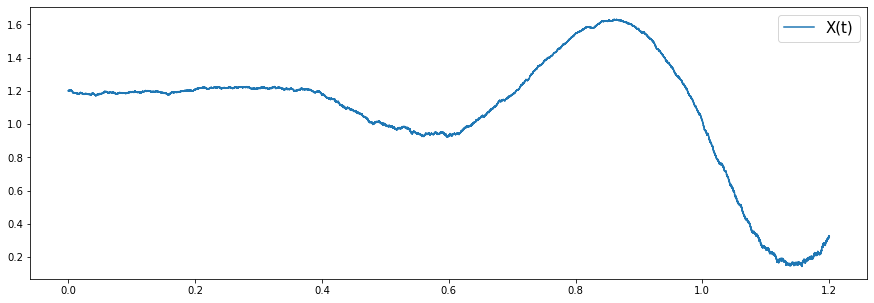

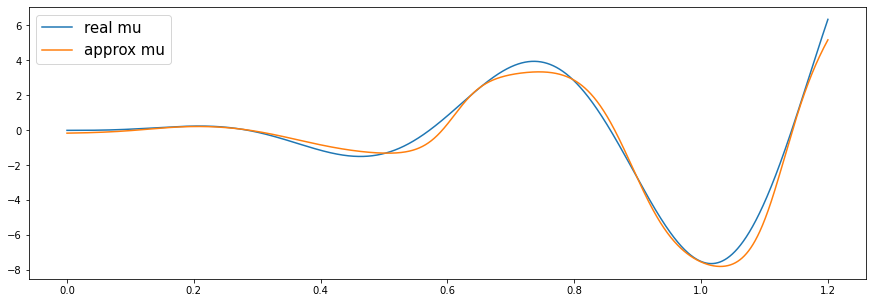

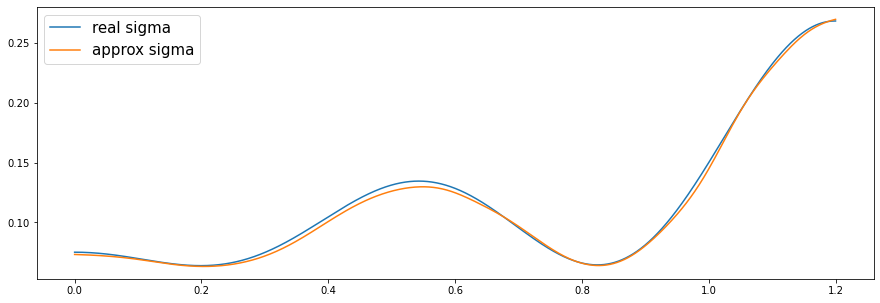

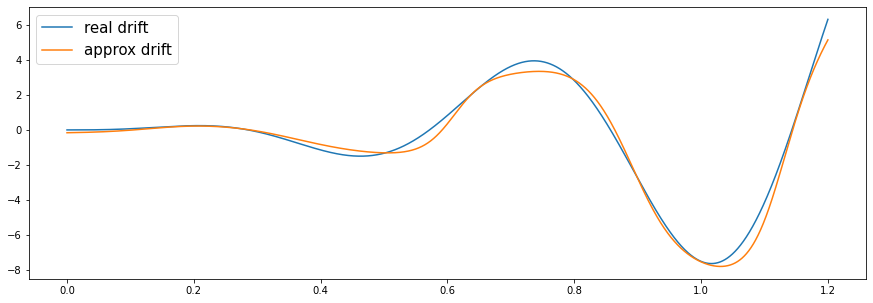

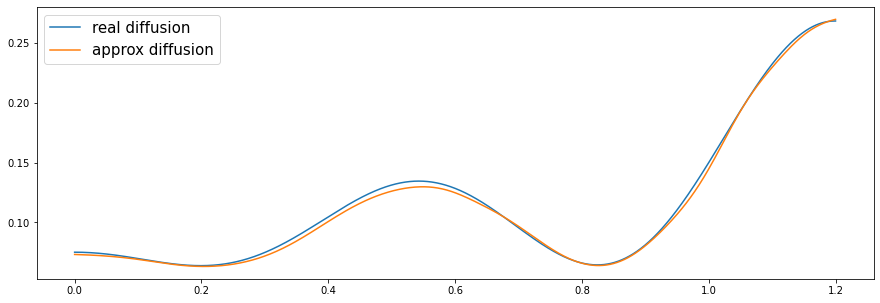

In [32]:
file = open('mu_example_04', 'rb')
mu_ = pickle.load(file)
file.close()


file = open('sigma_example_04', 'rb')
sigma_ = pickle.load(file)
file.close()


plt.plot(t_values, x_values, label='X(t)')
plt.legend()
plt.show()

plt.plot(t_values, mu(t_values), label='real mu')
plt.plot(t_values, mu_, label='approx mu')
plt.savefig("example_04_mu.png")
plt.legend()
plt.show()

plt.plot(t_values, sigma(t_values), label='real sigma')
plt.plot(t_values, sigma_, label='approx sigma')
plt.legend()
plt.savefig("example_04_sigma.png")
plt.show()

plt.plot(t_values, a(t_values,x_values), label='real drift')
plt.plot(t_values, 1.*a_(t_values,x_values,mu_,sigma_), label='approx drift')
plt.legend()
plt.savefig("example_04_drift.png")
plt.show()

plt.plot(t_values, b(t_values,x_values), label='real diffusion')
plt.plot(t_values, 1.*b_(t_values,x_values,mu_,sigma_), label='approx diffusion')
plt.legend()
plt.savefig("example_04_diffusion.png")
plt.show()

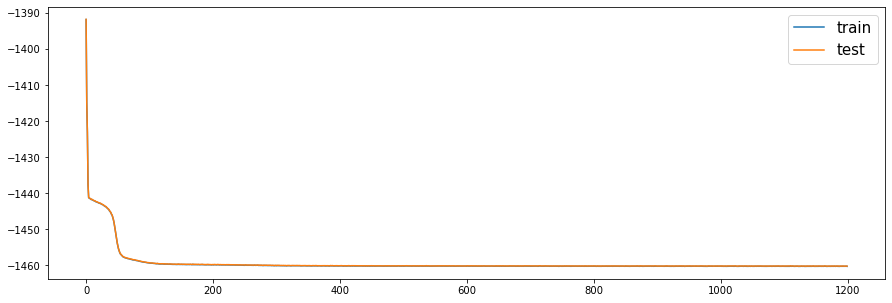

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['SDE_params_loss'], label='test')
plt.legend()
plt.show()

#### 4.2 Trajectories of both processes with prediction intervals

In [34]:
def b_real(t, x):
    return sigma(t)

In [35]:
def b_approx(t):
    return sigma_

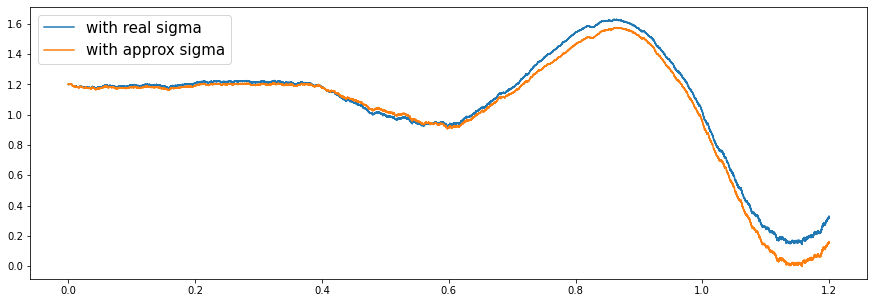

In [36]:
t_values, x_real_values, x_approx_values = trajectories(T,n,1,wiener_process)

fig = plt.figure(figsize=(15,5))
plt.plot(t_values, x_real_values, label='with real sigma')
plt.plot(t_values, x_approx_values, label='with approx sigma')
plt.legend()

plt.savefig("example_04_trajectory.png")
plt.show()

In [37]:
t_values, x_real_values, x_approx_values, x_approx_low_values, x_approx_up_values = trajectories_intervals(T,n,1,wiener_process)

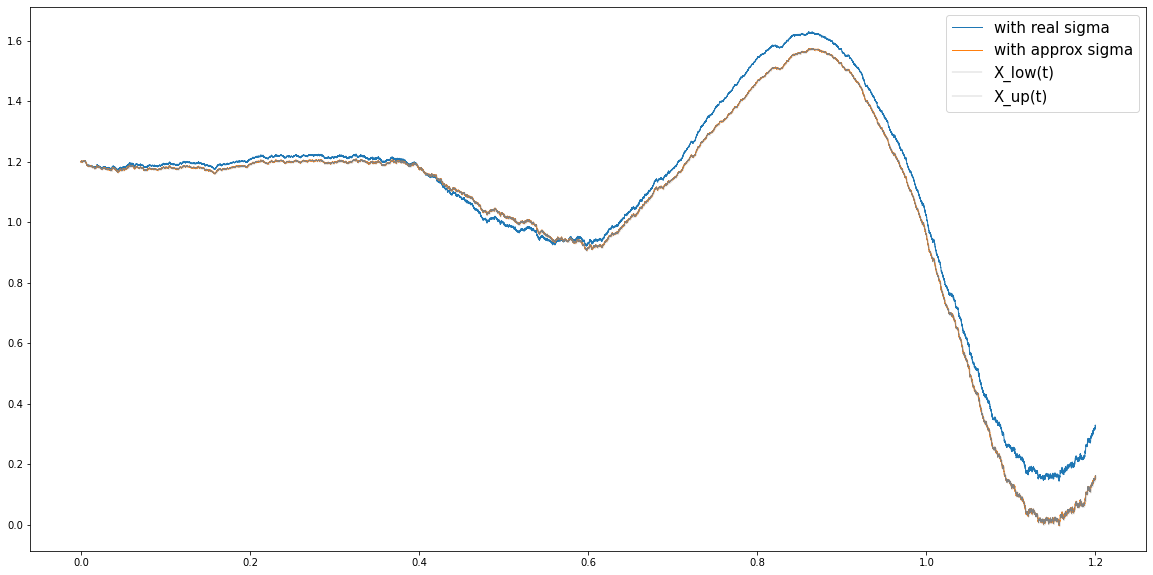

In [38]:
k = n

t = t_values[:k]
x1=x_real_values[:k]
x2=x_approx_values[:k]
x3=x_approx_low_values[:k]
x4=x_approx_up_values[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.show()

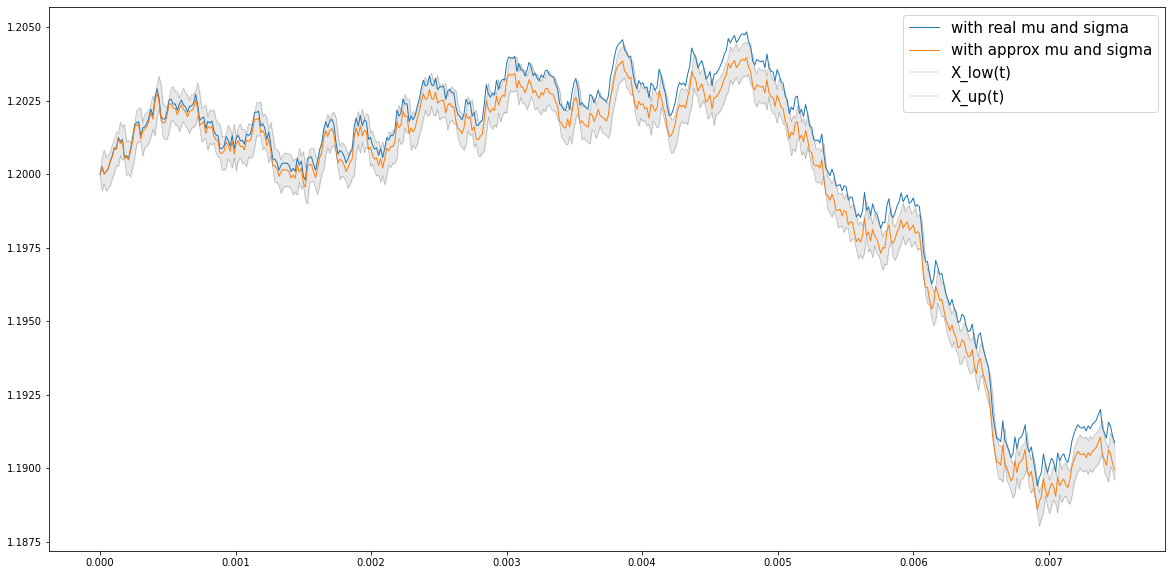

In [39]:
k = 500

t = t_values[:k]
x1=x_real_values[:k]
x2=x_approx_values[:k]
x3=x_approx_low_values[:k]
x4=x_approx_up_values[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real mu and sigma', linewidth=1)
plt.plot(t, x2, label='with approx mu and sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.savefig("example04_first.png")
plt.show()

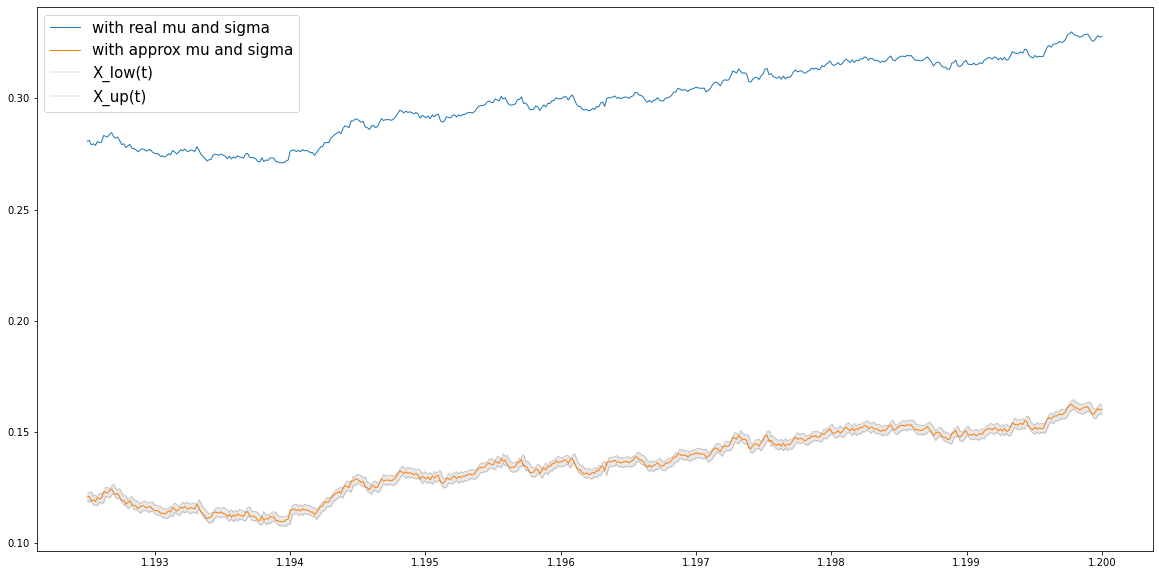

In [40]:
k = 500

t = t_values[n-k:]
x1=x_real_values[n-k:]
x2=x_approx_values[n-k:]
x3=x_approx_low_values[n-k:]
x4=x_approx_up_values[n-k:]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real mu and sigma', linewidth=1)
plt.plot(t, x2, label='with approx mu and sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.savefig("example04_last.png")
plt.show()

#### 4.3 Simulate many trajectories to see both distributions

In [41]:
n_traj = 100

In [42]:
X_tab, X_approx_tab = check_distribution(T, n, n_traj, trajectories)

Mean value for real:  0.5102026441998152
Mean value for approx:  0.34014092134311796
Standard deviation for real:  0.12790575130626397
Standard deviation for approx:  0.12595542598165269


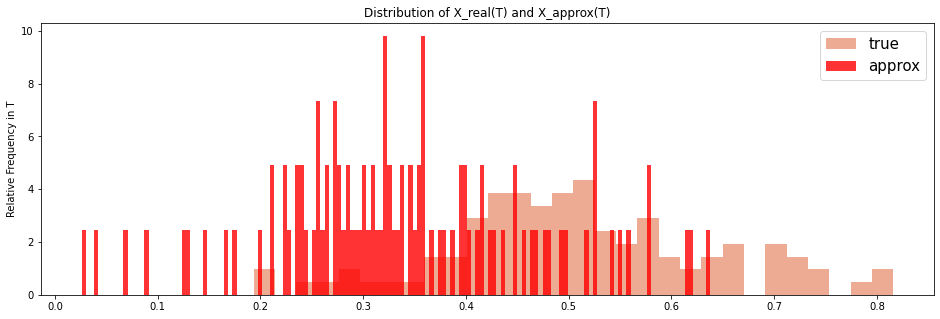

In [43]:
plot_distribution(X_tab, X_approx_tab)

In [44]:
def exp_val_approx(X, X_approx):
    return sum(np.square(np.abs(np.subtract(X,X_approx))))/len(X)

In [45]:
exp_val_approx(X_tab, X_approx_tab)

0.028928550807047496

In [46]:
np.sqrt(exp_val_approx(X_tab, X_approx_tab))

0.17008395223255926

In [47]:
# SAVE DATA AS PICKLE

result_tab = np.array([X_tab, X_approx_tab])

file = open('01_results_100', 'wb')
pickle.dump(result_tab, file)
file.close()

In [48]:
# OPEN IF NEEDED

file = open('01_results_100', 'rb')
data = pickle.load(file)
file.close()

X_test = data[0]
X_approx_test = data[1]

#### 4.4 Check our Theorem 1

In [49]:
# theta_1 
theta_approx = sigma_

In [50]:
# theta_2 
t_values = np.linspace(0,T,n+1)
theta_real = sigma(t_values)

In [51]:
# LEFT SIDE
np.sqrt(exp_val_approx(X_tab, X_approx_tab))

0.17008395223255926

In [52]:
# RIGHT SIDE
2*np.abs(theta_approx - theta_real).max()

0.011658042669296265

#### 4.5 Check Kolmogorov-Smirnov (KS) test

In [53]:
scipy.stats.ks_2samp(X_tab, X_approx_tab)

KstestResult(statistic=0.57, pvalue=2.458151170682656e-15)

#### 4.6 QQ plot

In [54]:
df_pct = pd.DataFrame()
df_pct['q_X'] = np.percentile(X_tab, range(100))
df_pct['q_X_approx'] = np.percentile(X_approx_tab, range(100))

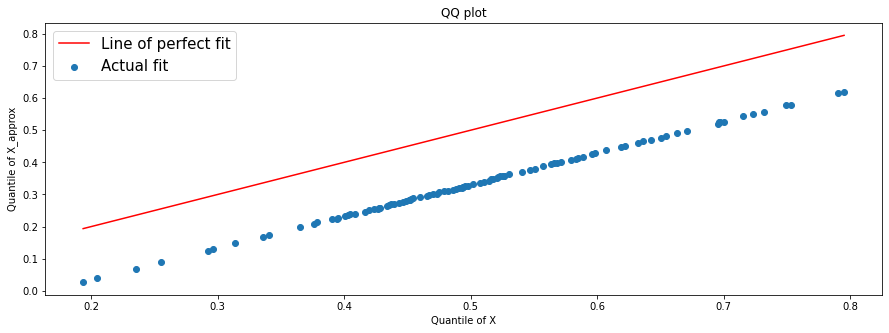

In [55]:
plt.scatter(x='q_X', y='q_X_approx', data=df_pct, label='Actual fit')
sns.lineplot(x='q_X', y='q_X', data=df_pct, color='r', label='Line of perfect fit')
plt.xlabel('Quantile of X')
plt.ylabel('Quantile of X_approx')
plt.legend()
plt.title("QQ plot")
plt.savefig("example_03_qq-plot.png")